In [3]:
import random
import gym
import numpy as np
from tqdm import tqdm
from agent import DQN_agent
from memory import ReplayBuffer
import torch
import utils
import matplotlib.pyplot as plt
from IPython.display import HTML, display

In [4]:
lr = 2e-3
num_iter = 10
num_episodes = 500
hidden_dim = 128
gamma = 0.98
epsilon = 0.01
target_update = 10
buffer_size = 10000
minimal_size = 500
batch_size = 64
device = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")
seed = 123

In [5]:
env_name = 'Taxi-v3'
env = gym.make(env_name, render_mode="rgb_array")

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
replay_buffer = ReplayBuffer(buffer_size)
state_dim = env.observation_space.n
action_dim = env.action_space.n

agent = DQN_agent(state_dim, action_dim, gamma, lr,
            epsilon, target_update, device)

In [6]:
rewards_list = []
durations_list = []
for i in range(num_iter):
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % (i+1)) as pbar:
        for i_episode in range(int(num_episodes / 10)):
            episode_rewards = 0
            episode_durations = 0
            state, _ = env.reset()
            encoded_state = utils.encode_state(state)
            done = False
            while not done:
                action = agent.take_action(encoded_state)
                next_state, reward, terminated, truncated, _ = env.step(action)
                done = terminated or truncated
                encoded_next_state = utils.encode_state(next_state)
                
                replay_buffer.add(encoded_state, action, reward, encoded_next_state, done)
                
                state = next_state
                encoded_state = encoded_next_state
                episode_rewards += reward
                episode_durations += 1
                # 当buffer数据的数量超过一定值后,才进行Q网络训练
                if replay_buffer.size() > minimal_size:
                    state_batch, action_batch, reward_batch, next_state_batch, done_batch = replay_buffer.sample(batch_size)
                    transition_dict = {
                        'states': state_batch,
                        'actions': action_batch,
                        'next_states': next_state_batch,
                        'rewards': reward_batch,
                        'dones': done_batch
                    }
                    agent.update(transition_dict)
            rewards_list.append(episode_rewards)
            durations_list.append(episode_durations)
            if (i_episode + 1) % 10 == 0:
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(rewards_list[-10:])
                })
            pbar.update(1)
print("complete the training of DQN agent!")

agent.save(f"./model/DQN_taxi_agent.pth")

Iteration 10: 100%|██████████| 50/50 [00:24<00:00,  2.01it/s, episode=500, return=-207.200]

complete the training of DQN agent!


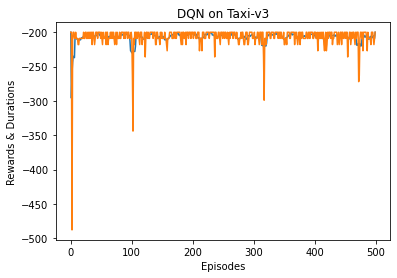

In [5]:
episodes_list = list(range(len(rewards_list)))
mv_rewards = utils.moving_average(rewards_list, 9)
plt.plot(episodes_list, mv_rewards)
plt.plot(episodes_list, rewards_list)
plt.xlabel('Episodes')
plt.ylabel('Rewards & Durations')
plt.title('DQN on {}'.format(env_name))
plt.show()

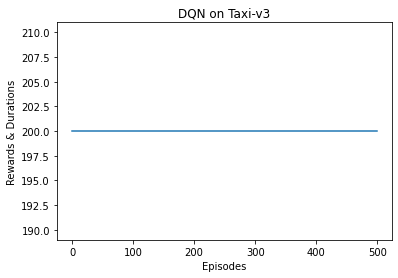

In [6]:
episodes_list = list(range(len(rewards_list)))
mv_durations = utils.moving_average(durations_list, 9)
plt.plot(episodes_list, mv_durations)
plt.xlabel('Episodes')
plt.ylabel('Rewards & Durations')
plt.title('DQN on {}'.format(env_name))
plt.show()

In [ ]:
animation = agent.play(env, save_path='./animation/game_animation.mp4')
HTML(animation.to_jshtml())

In [5]:
import gym
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
env_name = 'Taxi-v3'
env = gym.make(env_name, render_mode="rgb_array")

state, _ = env.reset()
observation = state.decode()

AttributeError: 'int' object has no attribute 'decode'

In [13]:
def decode_state(state):
    destination = state % 4
    state //= 4
    passenger_location = state % 5
    state //= 5
    return passenger_location, destination

In [6]:
def show_state(env, step=0, info=""):
    plt.figure(1)
    plt.clf()
    plt.imshow(env.render())
    plt.title("Step: %d %s" % (step, info))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.show()

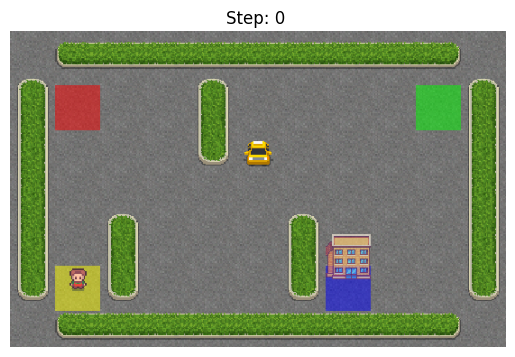

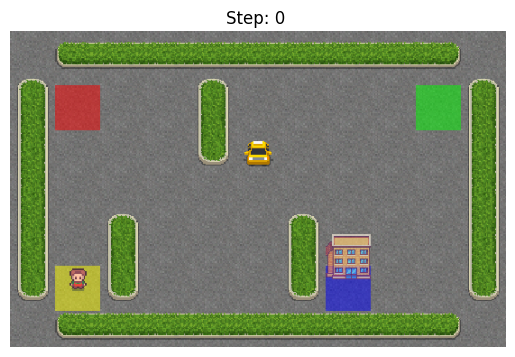

In [7]:
show_state(env)

In [14]:
observation = decode_state(state)

In [15]:
observation

(1, 2, 2, 3)

In [12]:
print(env.observation_space)

Discrete(500)


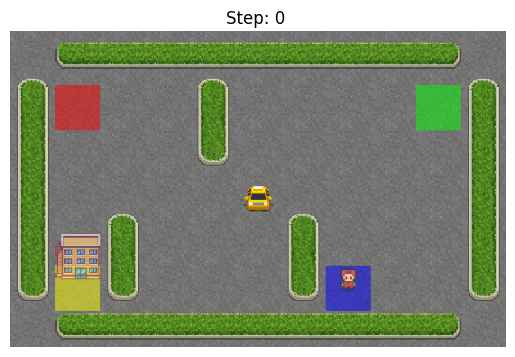

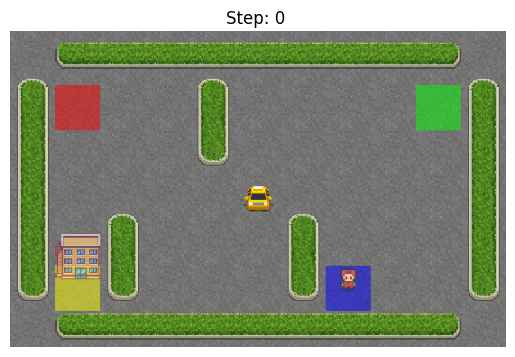

In [16]:
state , _ =env.reset()
show_state(env)

In [17]:
observation = decode_state(state)
print(observation)

(2, 2, 3, 2)


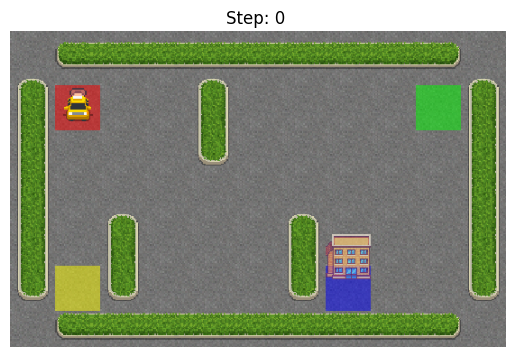

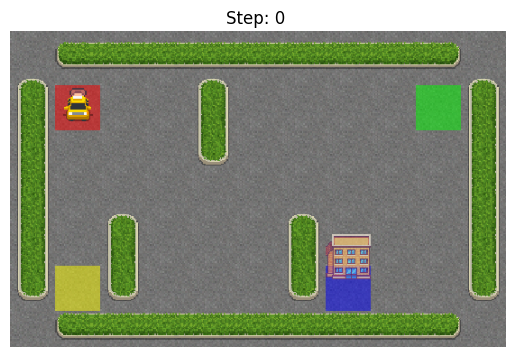

(0, 0, 0, 3)


In [24]:
state , _ =env.reset()
show_state(env)
observation = decode_state(state)
print(observation)

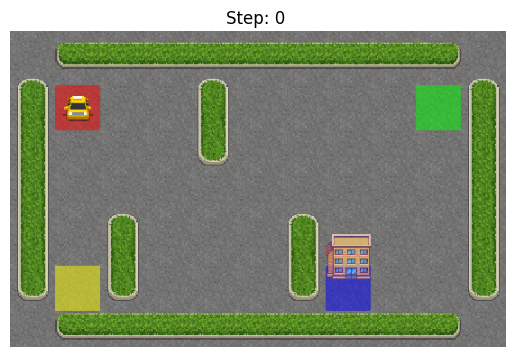

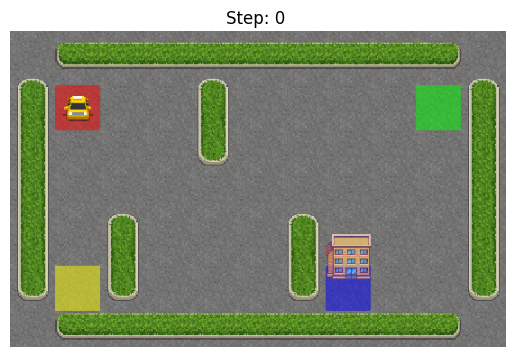

(0, 0, 4, 3)


In [27]:
state, reward, terminated, truncated, _ = env.step(4)
show_state(env)
observation = decode_state(state)
print(observation)

In [ ]:
observation.index